In [25]:
import numpy as np
import pandas as pd
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [27]:
hI_data = pd.read_csv("C:/Users/sravya.gangula/Downloads/Health_insurance.csv")
hI_data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
hI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
hI_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Analysis and Visualization

In [30]:
hI_data["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

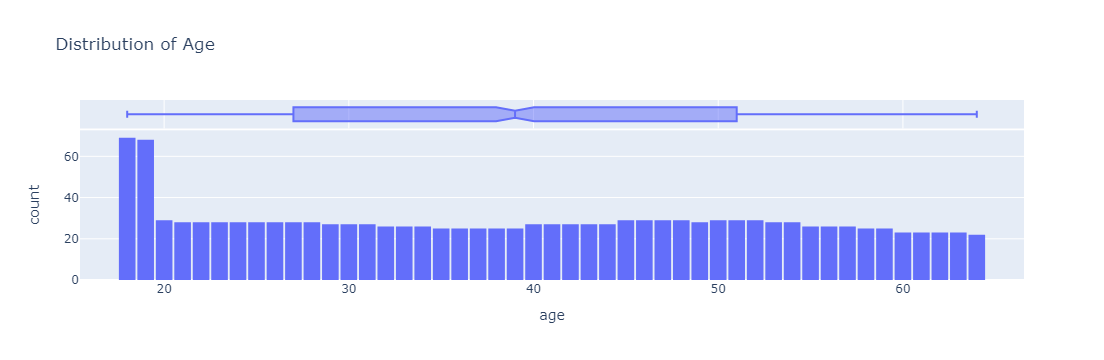

In [31]:
fig = px.histogram(hI_data, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

## The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages.

Insight: why there are over twice as many customers with ages 18 and 19, compared to other ages?

Insuarance agency charges more money for same premium as you get older and here is the same case.people who are younger are less prone to getting sick and thus company has to pay them less for their medical bills.otherwise every age group in US has eqvivalent population density.

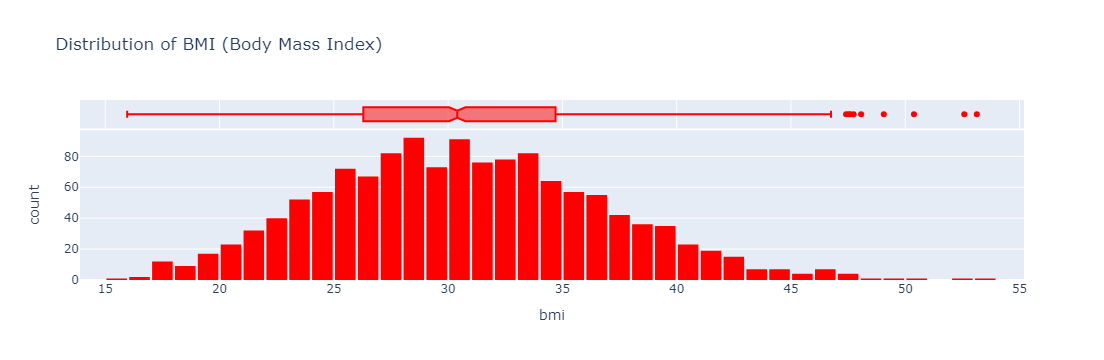

In [32]:
#Body Mass Index:
fig = px.histogram(hI_data, 
                   x='bmi', 
                   marginal='box', 
                   nbins=47, 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

## The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

Insight:why the distribution of ages forms a uniform distribution while the distribution of BMIs forms a gaussian distribution?

As there are same number of people in age groups the distribution we get is uniform distribution.But, for BMIs distribution we get gaussian distribution as people who are between 20-3- are considered to be healthy relatively and less than or more than this range is considered to be health risk categories and these people are more prone to health issues and thus company will have to pay more medical bills of this kind of customers and thus they provide these type of people same health insuarance at higher prices and which in-turn attracts lesser people with out of healthy range BMI because they have to pay moreuarance at higher prices and which in-turn attracts lesser people with out of healthy range BMI because they have to pay more

In [33]:
## Charges
##Let's visualize the distribution of "charges" i.e. the annual medical charges for customers.
##This is the column we're trying to predict. 
##Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.




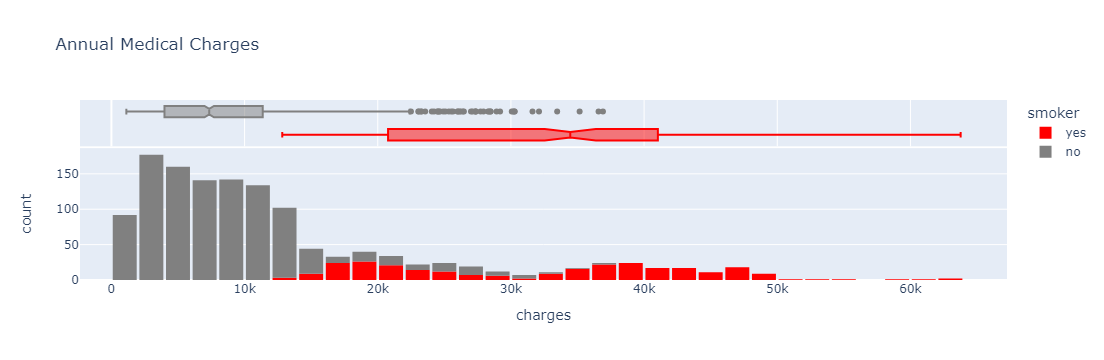

In [34]:
fig = px.histogram(hI_data, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['red', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

## We can make the following observations from the above graph:

For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is close to \$35,000.

## Visualization of the distribution of medical charges in connection with other factors like "sex" and "region".

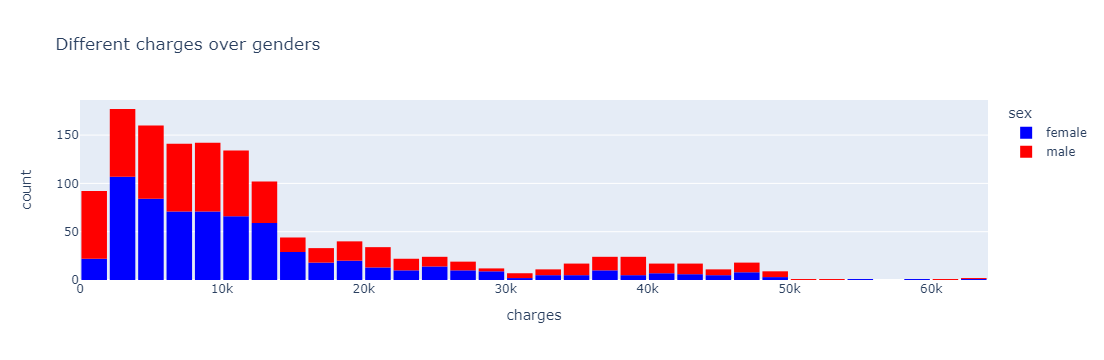

In [35]:
fig = px.histogram(hI_data,
                   x = 'charges',
                   color = 'sex',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Different charges over genders'
               
)
fig.update_layout(bargap=0.1)
fig.show()

fig = px.histogram(hI_data,
                  x = "charges",
                  marginal = 'box', 
                   color="region",
                  title = "charges over different regions of U.S.A")
fig.update_layout(bargap=0.1)
fig.show()

## Here in the distribution of charges over gender we see that males are substancially charged more because by subconsious behaviour males are exploratory and they are more likely to take risks and that keeps them in danger more than their counterpart.It is also evident that males of U.S are more inclined to get health insuarrance then female. And, in second distribution we see that southeaster part of U.S is leading in charges but majority of all customers from all parts of US are charged between 0-20k only

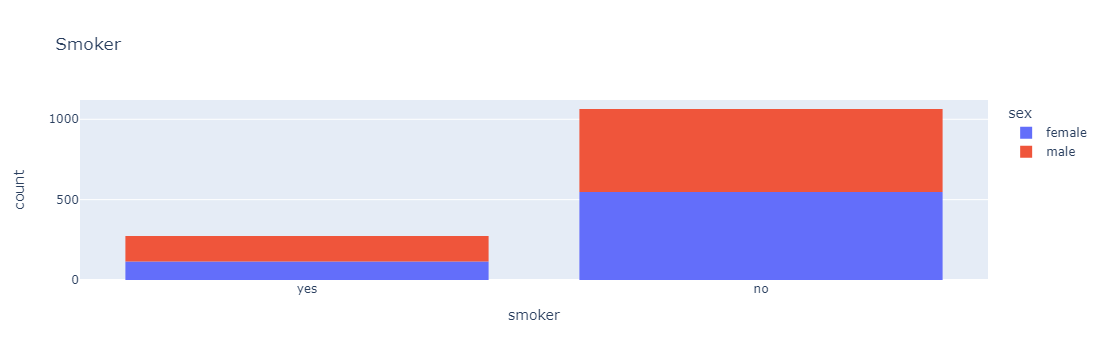

In [39]:
## Smoker
## Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

px.histogram(hI_data, x='smoker', color='sex', title='Smoker')

## It appears that 20% of customers have reported that they smoke
We can also see that smoking appears a more common habit among males. This is true for the given dataset only and so we should always verify if these results of analysis also matches the general population which we are going to use our model on otherwise the model will assume that in general population also 20 % people are smokers but in reality it was only 10 % so we would get incorrect predictions.
So it is best to check if our primary data analysis matches the results of the general public.

## Visualization of the distributions of the "sex", "region" and "children" columns

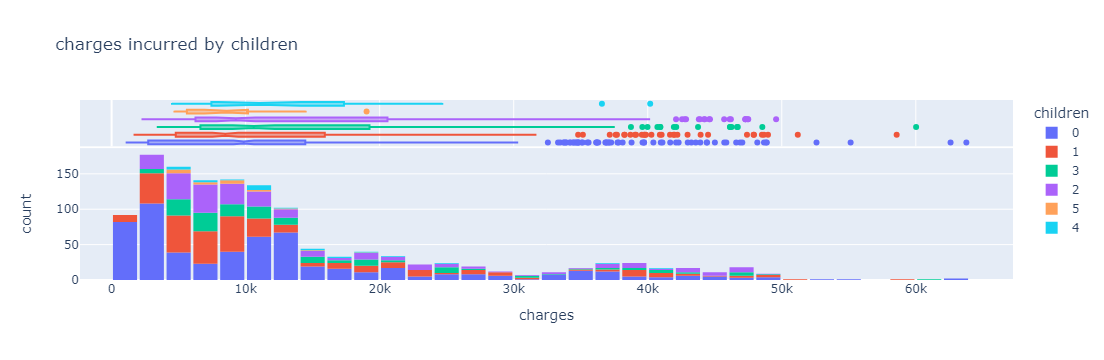

In [43]:
fig = px.histogram(hI_data,
                  x = 'charges',
                   marginal ="box",
                  color = 'children',
                  title = 'charges incurred by children')
fig.update_layout(bargap=0.1)
fig.show()

## It seems that majority of our customers have 0 or 1 child and median charges vary between 8.5k to 11k dollars

We can also conclude that people who have more children are given less priority in terms of pricing discounts.

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

## Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

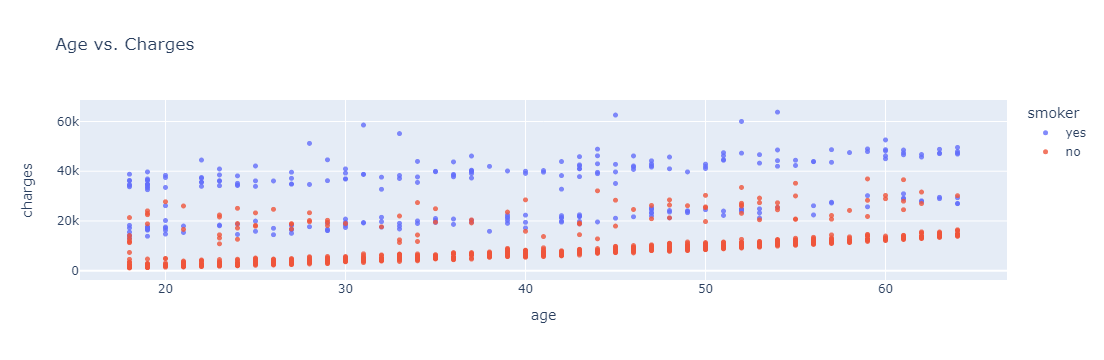

In [44]:
fig = px.scatter(hI_data, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

## We can make the following observations from the above chart:

## The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.
We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

Insight: What other inferences can we draw from the above chart?

even if you have ailment or not people who are smokers for majority of the cases incurred more charges in medical bills than non-smokers and this difference is not small it is in the range of 5000 to 1000 $

## BMI and Charges
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot.
Once again, we'll use the values from the "smoker" column to color the points.

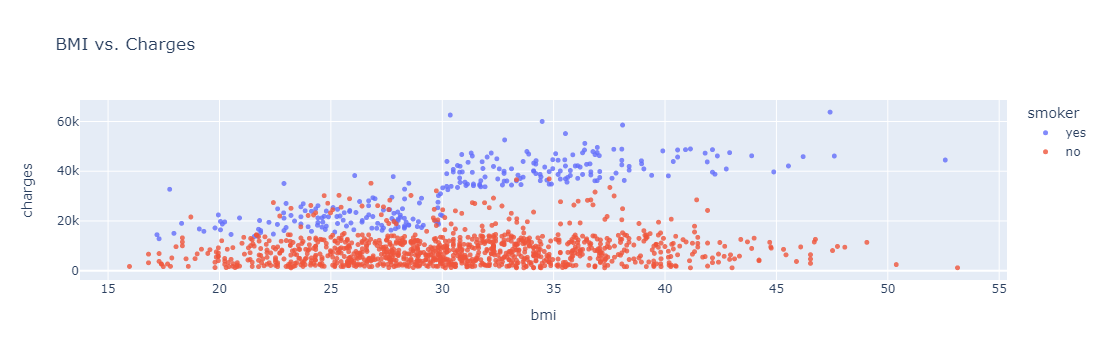

In [45]:
fig = px.scatter(hI_data, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

## It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30

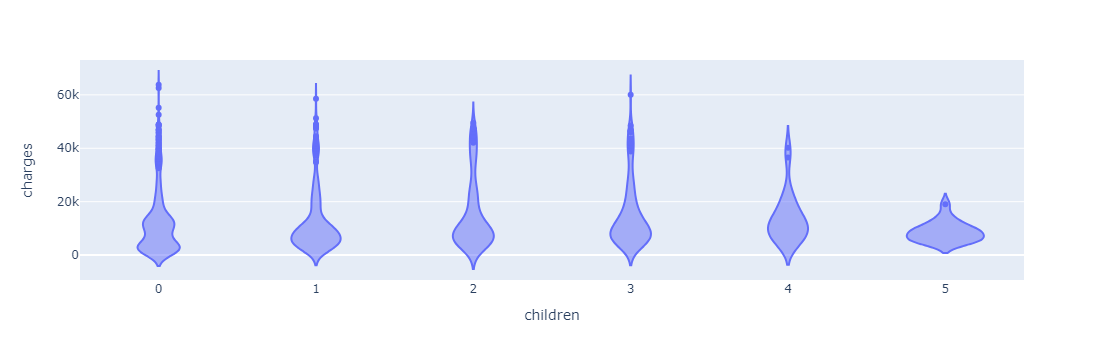

In [48]:
## Visualizing how the "charges" column is related to other columns ("children", "sex", "region" and "smoker").

px.violin(hI_data,x = 'children',y = 'charges')

## There doesn't seem to have a strong trend among this variables but we can see that customer having 5 children have charges incurred in a very specific range of 0 to 20,000$ and majority of customers having any number of children or no children altogether have charges in range of 0-20,000 dollars

<Axes: xlabel='sex', ylabel='charges'>

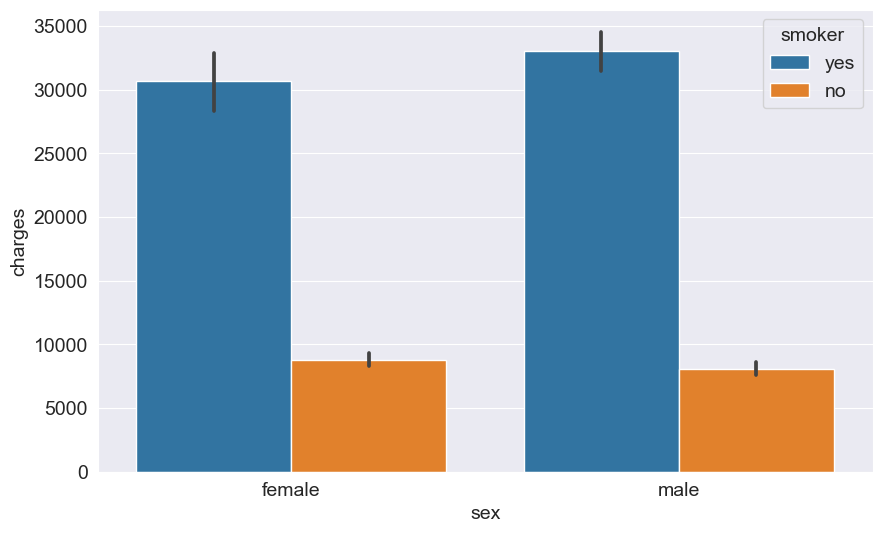

In [49]:
sns.barplot(data = hI_data,x = 'sex',y = 'charges',hue = "smoker")


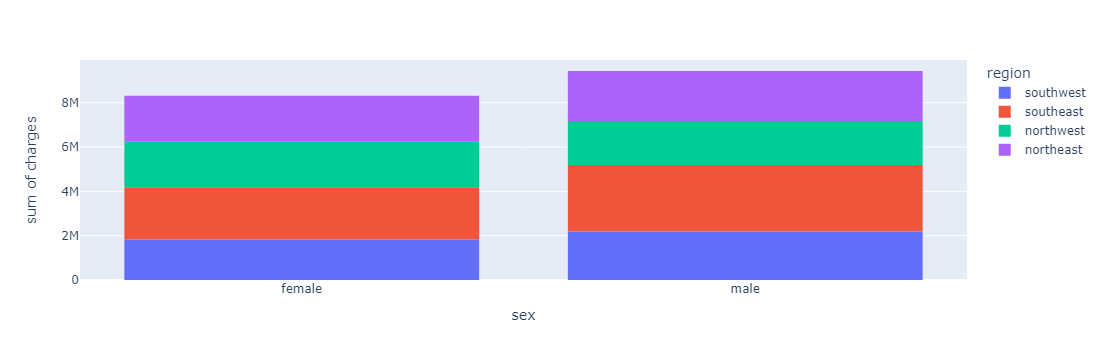

In [50]:
px.histogram(hI_data,x='sex',y = 'charges',color = 'region')


## We can infer that from every region our customer base which has males are incurring more bills but interestingly females of northwest region are having more medical bills why is this happening that needs more in dept research

In [54]:
non_smoker_df = hI_data[hI_data.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


## Linear Regression 

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [52]:
model = LinearRegression()

In [55]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


## Let's fit the model to the data.

In [56]:
model.fit(inputs, targets)

LinearRegression()

In [58]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

## Let's compute the RMSE loss to evaluate the model.

In [60]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [61]:
rmse(targets, predictions)

4662.505766636395

## Seems like our prediction is off by $4000 on average, which is not too bad.

In [62]:
model.coef_

array([267.24891283])

In [63]:
model.intercept_

-2091.4205565650827

## Model creation for Smokers in the dataset

In [68]:
smoker_df = hI_data[hI_data.smoker == 'yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [69]:
inputs = smoker_df[['age']]
targets = smoker_df.charges
print('',inputs.shape)
print('',targets.shape)

 (274, 1)
 (274,)


In [70]:
model.fit(inputs,targets)

LinearRegression()

In [71]:
predicted = model.predict(inputs)
print('RMSE:',)
rmse(targets,predicted)

RMSE:


10711.00334810241

## Machine Learning
Every machine learning problem has three components:

Model

Cost Function

Optimizer

In [72]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395
